In [1]:
import json
import pandas
import gzip

In [2]:
json_data = json.load(gzip.open('data/data.json.gz'))

In [3]:
dfs = {name: pandas.DataFrame(json_data[name]) for name in json_data}

In [4]:
dfs.keys()

dict_keys(['Allensbach', 'Emnid', 'Forsa', 'Forsch’gr.Wahlen', 'GMS', 'Infratestdimap', 'INSA', 'Yougov'])

In [5]:
dfs['Allensbach']

,Date,CDU/CSU,SPD,GRÃNE,FDP,LINKE,AfD,Sonstige,Befragte,Zeitraum
0,19.11.2019,29.5,14.0,21.5,7.5,8.0,14.5,5,1.298,02.11.–13.11.
1,16.10.2019,29.5,16.0,23.5,6.5,7.0,13.0,4.5,1.238,27.09.–10.10.
2,17.09.2019,29.0,15.0,22.0,7.0,8.0,14.0,5,1.255,01.09.–12.09.
3,21.08.2019,29.5,13.5,24.0,7.0,8.0,12.5,5.5,1.262,02.08.–15.08.
4,24.07.2019,29.5,14.5,23.0,7.0,8.5,11.5,6,1.228,01.07.–11.07.
...,...,...,...,...,...,...,...,...,...,...
73,29.01.2014,40.0,26.0,10.0,5.0,8.5,5.0,5.5,?,10.01.–23.01.
74,19.12.2013,41.5,25.5,10.5,4.0,9.0,4.5,5,?,01.12.–12.12.
75,27.11.2013,40.0,26.5,10.0,4.0,9.5,5.0,5,?,08.11.–21.11.
76,23.10.2013,41.0,25.0,9.0,5.0,9.0,5.5,5.5,?,01.10.–16.10.


In [6]:
for df in dfs:
    dfs[df]['Date'] = pandas.to_datetime(dfs[df]['Date'])
    dfs[df] = dfs[df].set_index('Date')

In [7]:
parties = dfs['Allensbach'].columns[:-2]

In [8]:
dfs['Allensbach'][parties].describe()

,CDU/CSU,SPD,GRÃNE,FDP,LINKE,AfD
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,35.748718,22.714103,11.779487,7.108974,8.728205,9.330769
std,4.310113,4.141043,4.326042,2.288037,0.613040,3.404859
min,28.000000,12.000000,7.000000,3.000000,7.000000,3.500000
25%,33.000000,20.125000,9.500000,5.000000,8.500000,6.125000
50%,35.250000,24.000000,10.500000,7.000000,9.000000,10.000000
75%,40.000000,26.000000,12.000000,9.000000,9.000000,12.500000
max,42.000000,33.000000,25.000000,12.000000,10.000000,15.000000


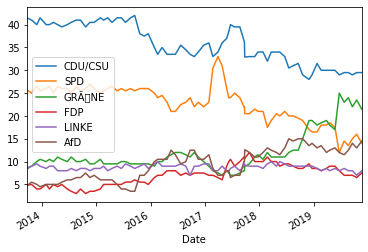

In [10]:
dfs['Allensbach'][parties].plot()
None